# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

In [2]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

200
200


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


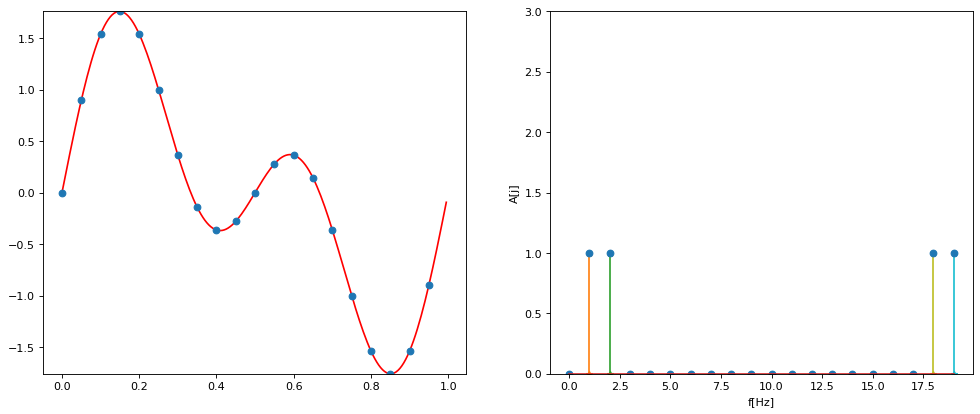

200
200


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


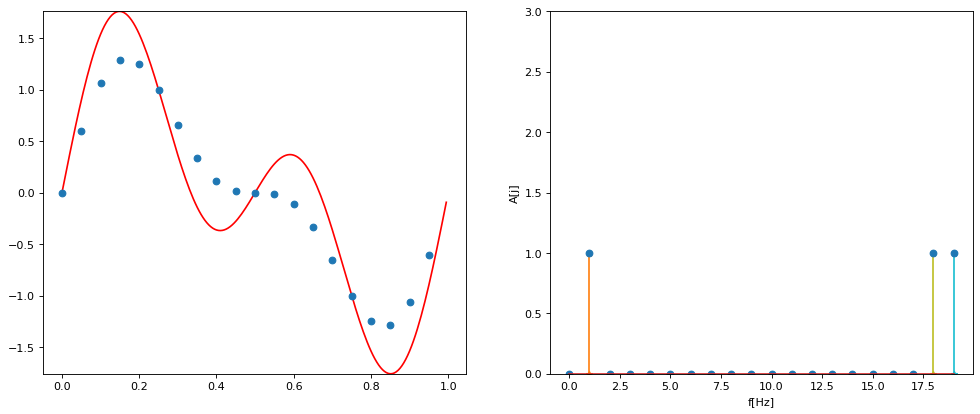

In [4]:

# Wyrysuj sygnał
# Zdefiniuj funckję
def create_signal(A = 1, A2=1, LP = 1, w = 40, f = 2.0):
   
    T = 1.0/f    
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
 
    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)
 
    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki
 
    n = len(t)
 
 
 
    FUNC = lambda t :  A*sin(2*pi*t) + A2*sin(4*pi*t)
    # def. funkcji (tutaj sinus)
 
    signal = FUNC(t)                
    # funkcja sprobkowana
 
    fig = plt.figure(figsize=(15, 6), dpi=80)  
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    print(len(base_signal))
    print(len(base_t))
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## ---
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu
 
    #TW
    freqs = np.arange(0, w, w / n) # range HZ
 
 
    ax = fig.add_subplot(122)
 
    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.stem(freqs, signal1, '-*')
   
   
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
   
    plt.show()
   
create_signal(f=1.0, w=20)
 

def create_signal(A = 1, A2=1, LP = 1, w = 40, f = 2.0):
   
    T = 1.0/f    
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
 
    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)
 
    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki
 
    n = len(t)
 
 
 
    FUNC = lambda t :  A*sin(2*pi*t) + A2*sin(4*pi*t)
    # def. funkcji (tutaj sinus)
 
    signal = FUNC(t)                
    # funkcja sprobkowana
   
    signal = fft(signal)
   
    #print(signal)
   
    signal[2] = 0
   
    signal = ifft(signal)
 
   
    fig = plt.figure(figsize=(15, 6), dpi=80)  
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    print(len(base_signal))
    print(len(base_t))
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## ---
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu
 
    #TW
    freqs = np.arange(0, w, w / n) # range HZ
 
 
    ax = fig.add_subplot(122)
 
    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.stem(freqs, signal1, '-*')
   
   
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
   
    plt.show()
   
create_signal(f=1.0, w=20)

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

[ 2.10602227e-16+0.00000000e+00j -3.76331591e-15-1.00000000e+01j
 -8.89322657e-15-1.00000000e+01j -2.32002597e-15+1.77635684e-15j
  8.60538107e-16+4.98521198e-17j  1.37992582e-15-1.63367938e-15j
 -3.64303730e-16-4.44089210e-15j -1.25079063e-15-2.66453526e-15j
  1.15777861e-16-5.52868481e-16j  9.88260495e-16-1.31416902e-15j
 -1.57655556e-16+1.77635684e-15j -1.68244555e-15+3.55271368e-15j
  1.15777861e-16+5.52868481e-16j  1.57193928e-15-4.62187820e-16j
  1.79540794e-16+0.00000000e+00j -1.56819466e-15-2.66453526e-15j
  8.60538107e-16-4.98521198e-17j  4.35513708e-16+1.63367938e-15j
  5.84776411e-15+1.00000000e+01j  7.43378021e-15+1.00000000e+01j]
[   0.          -90.          -90.          142.56007463    3.31551521
  -49.81310311  -94.6896956  -115.14637872  -78.17243542  -53.05668396
   95.07183677  115.34065897   78.17243542  -16.38459997    0.
 -120.47865847   -3.31551521   75.07297467   90.           90.        ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


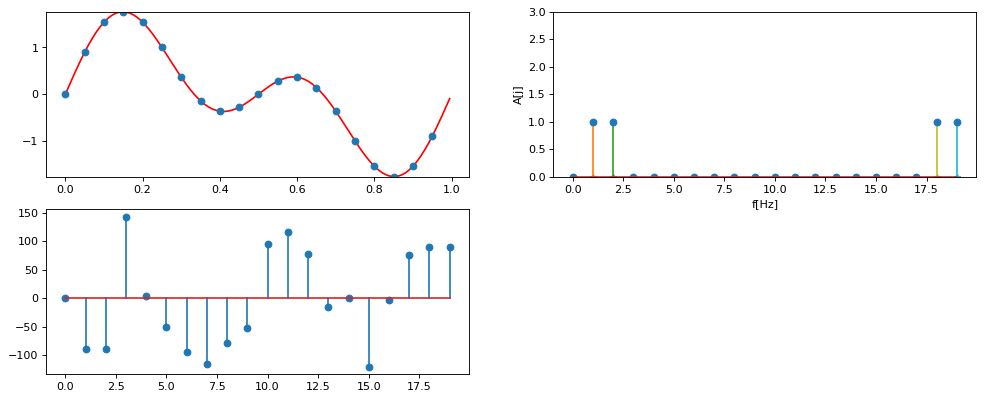

[-1.11022302e-16+0.00000000e+00j -1.99840144e-15-1.00000000e+01j
  1.00000000e+01-3.10862447e-15j -2.88657986e-15+1.33226763e-15j
 -6.54941317e-16-8.42990874e-17j -1.05654231e-15-4.22443112e-15j
  2.66453526e-15+2.30799155e-15j -2.92759141e-16-2.66453526e-15j
  7.10452468e-16+1.55301696e-15j -5.30475743e-16+2.25853878e-15j
  1.13797860e-15+3.22337762e-15j -3.22799422e-15+2.22044605e-16j
  7.10452468e-16-1.55301696e-15j  2.46408545e-15-3.80927309e-17j
  1.13797860e-15+3.79250975e-15j -3.82793665e-15+1.11022302e-15j
 -6.54941317e-16+8.42990874e-17j  1.11110246e-17+2.44807428e-15j
  1.00000000e+01-6.21525445e-15j  9.12504685e-15+1.00000000e+01j]
[ 1.80000000e+02 -9.00000000e+01 -1.78111062e-14  1.55224859e+02
 -1.72665646e+02 -1.04041790e+02  4.08987555e+01 -9.62700803e+01
  6.54175159e+01  1.03217799e+02  7.05549720e+01  1.76064984e+02
 -6.54175159e+01 -8.85674997e-01  7.32976279e+01  1.63826165e+02
  1.72665646e+02  8.97399546e+01 -3.56107849e-14  9.00000000e+01]


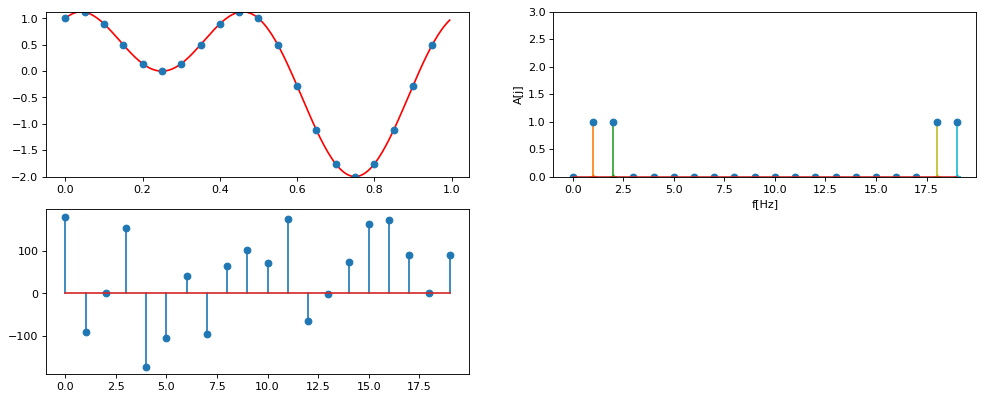

In [48]:
def create_signal(LP = 1, w = 40, f = 2.0, FUNC = lambda t :  sin(2*pi*t) + sin(4*pi*t)):
    T = 1.0/f    
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
 
    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)
 
    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki
 
    n = len(t)
 

    # def. funkcji (tutaj sinus)
 
    signal = FUNC(t)                
    # funkcja sprobkowana
   
 
   
    fig = plt.figure(figsize=(15, 6), dpi=80)  
    ax = fig.add_subplot(221)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    ax.plot(t, signal, 'o')
    
    signal1 = fft(signal)
    angles = angle(signal1, deg=True)
    print(signal1)
    print(angles)
    # sygnal w dziedzinie czestotliwosci
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu
    
    #TW
    freqs = np.arange(0, w, w / n) # range HZ

    ax = fig.add_subplot(222)
 
    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    xlabel("f[Hz]")
    ylabel("A[j]")
   
    
    ax = fig.add_subplot(223)
    stem(angles)
    
    plt.show()
   
create_signal(f=1.0, w=20)

create_signal(f=1.0, w=20, FUNC = lambda t :  sin(2*pi*t) + cos(4*pi*t))

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


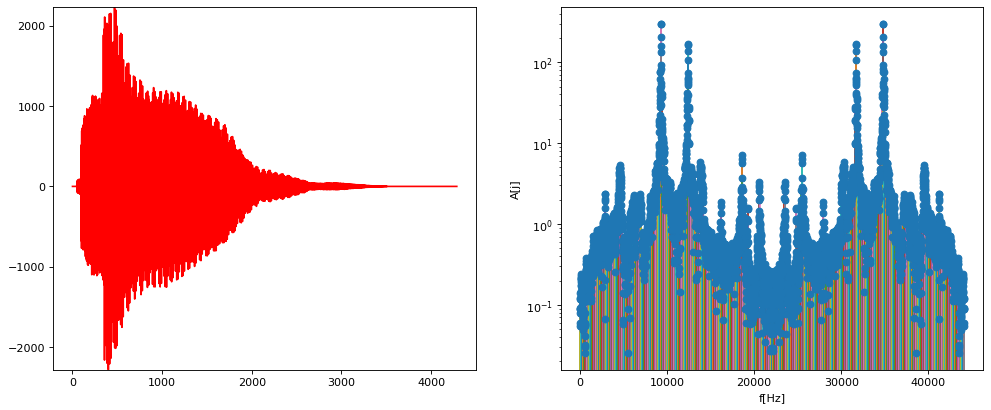

In [5]:
import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal]   #Tylko pierwszy kanał
#print(signal)
#print(w)

#spectrum[::10]        # co 10-ty element
#print(signal)

spectrum = signal[::10]
n = len(spectrum)

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)

ax.plot(spectrum, linestyle='-', color='red')
ax.set_ylim([min(spectrum), max(spectrum)])

signal = fft(spectrum)

signal = abs(signal)*2/len(spectrum)        
# modul sygnalu

freqs = np.arange(0, w, w / n)
ax = fig.add_subplot(122)
xlabel('f[Hz]')
ylabel('A[j]')

ymax = max(signal)
if (not ymax > 3.0):
    ax.set_ylim([0.0,3.0])
stem(freqs, signal, '-*')
yscale('log')

show()